In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from pymcaspec import specfile

%matplotlib widget

Load the specfile
Executing the object shows basics of the specfile

In [2]:
F = specfile('LCOLAO')
F

Specfile LCOLAO
 193 scans
['#F ./data/LCOLAO', '#E 1245781670', '#D Tue Jun 15 15:12:58 2010', '#C fourc  User = xliu', '#O0 Two Theta     Theta       Chi       Phi   Old_phi   MonoRot  GammaRot  GammaTran', '#O1 OMSSpare0      chi2   FHTrans     FHROT   FHLift1   FHLift2   FHLift3   FHLift4', '#O2     atth       ath    V_SLIT    H_SLIT  MIRLift1  MIRLift2  MIRLift3  SlitLeft', '#O3 MCBSpare0  SlitRight   SlitTop  SlitBottom  DetSlitLeft  DetSlitRight  DetSlitTop  DetSlitBotom', '#O4    PATTH      PATH     Spare  Sample_Z  LTA_act1  LTA_act2  LTA_act3  tbheight', '#O5  tbpitch    tbroll   mheight    mpitch     mroll  ']

These keys are availble in the scan

In [3]:
list_of_keys = F.keys()
print('{} ...'.format(list_of_keys[:5]))

['1.1', '2.1', '3.1', '4.1', '5.1'] ...


These keys can be indexed a string or list of string

In [4]:
S = F['3.1']

S_multple = F[['2.1', '3.1']]

If integers are passed the code will assume a '.1' suffix 

In [5]:
S_multple = F[2:4]

View the scan properties by

In [6]:
S

Key: 3.1
Scanned Motors are:
Two Theta	H	K	L	Epoch	Seconds	Detector3	attval	Detcor	Current	tsam	treg	vtoffs	nsls	sca1	sca2	sca3	sca4	THR	SCA1	SCA2	Monitor	Detector
Baseline Motors are:
Two Theta	Theta	Chi	Phi	Old_phi	MonoRot	GammaRot	GammaTran	OMSSpare0	chi2	FHTrans	FHROT	FHLift1	FHLift2	FHLift3	FHLift4	atth	ath	V_SLIT	H_SLIT	MIRLift1	MIRLift2	MIRLift3	SlitLeft	MCBSpare0	SlitRight	SlitTop	SlitBottom	DetSlitLeft	DetSlitRight	DetSlitTop	DetSlitBotom	PATTH	PATH	Spare	Sample_Z	LTA_act1	LTA_act2	LTA_act3	tbheight	tbpitch	tbroll	mheight	mpitch	mroll


Data can be extracted by passing either columns numbers or column names

In [7]:
I = S['Detector']
H = S[1]

To have a quick look at the data you can generate an
automatic plot assuming you want to plot the last index against the first

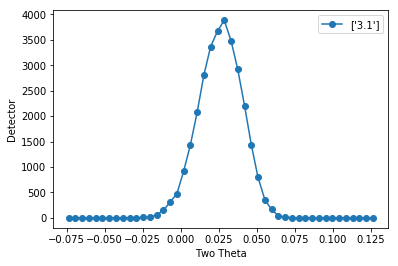

In [8]:
_ = S.plot()

But this can be overridden by passing keywords

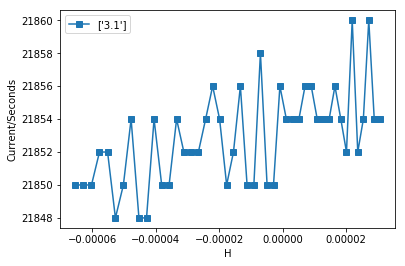

In [9]:
_ = S.plot(xkey='H', ykey='Current', monitor='Seconds')

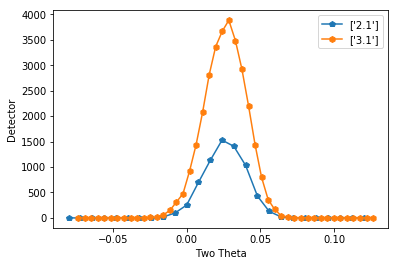

In [10]:
_ = S_multple.plot()